In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as snc
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from tensorflow.python.keras.layers.core import Dense, Activation

In [2]:
air_quality = pd.read_csv("air.csv", decimal=",")

In [3]:
air_quality.dropna(axis=0, how= 'all', inplace=True)
air_quality.dropna(axis=1, inplace=True)

In [4]:
air_quality.replace(to_replace= -200, value= np.NaN, inplace= True)
air_quality

,Date,Time,CO,PT08S1,NMHC,C6H6,PT08S2,NOx,PT08S3,NO2,PT08S4,PT08S5,T,RH,AH
0,03-10-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,03-10-2004,19:00:00,2,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,03-10-2004,20:00:00,2.2,1402.0,88.0,9,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54,0.7502
3,03-10-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11,60,0.7867
4,03-10-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04-04-2005,10:00:00,3.1,1314.0,NaN,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04-04-2005,11:00:00,2.4,1163.0,NaN,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04-04-2005,12:00:00,2.4,1142.0,NaN,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04-04-2005,13:00:00,2.1,1003.0,NaN,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [5]:
air_quality.fillna(air_quality.mean(), inplace= True)

In [6]:
air_quality.loc[:,'Date']=air_quality['Date']
air_quality.head()

,Date,Time,CO,PT08S1,NMHC,C6H6,PT08S2,NOx,PT08S3,NO2,PT08S4,PT08S5,T,RH,AH
0,03-10-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,03-10-2004,19:00:00,2,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,03-10-2004,20:00:00,2.2,1402.0,88.0,9,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54,0.7502
3,03-10-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11,60,0.7867
4,03-10-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [7]:
from datetime import datetime
Date= []
for i in air_quality['Date']:
    Date.append(datetime.strptime(i,'%m-%d-%Y'))
air_quality.dtypes

Date       object
Time       object
CO         object
PT08S1    float64
NMHC      float64
C6H6       object
PT08S2    float64
NOx       float64
PT08S3    float64
NO2       float64
PT08S4    float64
PT08S5    float64
T          object
RH         object
AH         object
dtype: object

In [8]:
date=pd.Series(Date)
air_quality['Date']=pd.to_numeric(date)

In [9]:
air_quality['Date']=air_quality['Date'].astype(float)
air_quality.dtypes
air_quality

,Date,Time,CO,PT08S1,NMHC,C6H6,PT08S2,NOx,PT08S3,NO2,PT08S4,PT08S5,T,RH,AH
0,1.078877e+18,18:00:00,2.6,1360.0,150.000000,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,1.078877e+18,19:00:00,2,1292.0,112.000000,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,1.078877e+18,20:00:00,2.2,1402.0,88.000000,9,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54,0.7502
3,1.078877e+18,21:00:00,2.2,1376.0,80.000000,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11,60,0.7867
4,1.078877e+18,22:00:00,1.6,1272.0,51.000000,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,1.112573e+18,10:00:00,3.1,1314.0,218.811816,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,1.112573e+18,11:00:00,2.4,1163.0,218.811816,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,1.112573e+18,12:00:00,2.4,1142.0,218.811816,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,1.112573e+18,13:00:00,2.1,1003.0,218.811816,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [10]:
air_quality.loc[:,'Time']=air_quality['Time']

In [11]:
from datetime import datetime
Time= []
for i in air_quality['Time']:
    Time.append(datetime.strptime(i,'%H:%M:%S'))
air_quality.dtypes

Date      float64
Time       object
CO         object
PT08S1    float64
NMHC      float64
C6H6       object
PT08S2    float64
NOx       float64
PT08S3    float64
NO2       float64
PT08S4    float64
PT08S5    float64
T          object
RH         object
AH         object
dtype: object

In [12]:
time=pd.Series(Time)
air_quality['Time']=pd.to_numeric(time)

In [13]:
air_quality['Time']=air_quality['Time'].astype(float)
air_quality.dtypes

Date      float64
Time      float64
CO         object
PT08S1    float64
NMHC      float64
C6H6       object
PT08S2    float64
NOx       float64
PT08S3    float64
NO2       float64
PT08S4    float64
PT08S5    float64
T          object
RH         object
AH         object
dtype: object

In [14]:
air_quality.tail()

,Date,Time,CO,PT08S1,NMHC,C6H6,PT08S2,NOx,PT08S3,NO2,PT08S4,PT08S5,T,RH,AH
9352,1.112573e+18,-2.208953e+18,3.1,1314.0,218.811816,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,1.112573e+18,-2.208949e+18,2.4,1163.0,218.811816,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,1.112573e+18,-2.208946e+18,2.4,1142.0,218.811816,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,1.112573e+18,-2.208942e+18,2.1,1003.0,218.811816,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,1.112573e+18,-2.208938e+18,2.2,1071.0,218.811816,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [16]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
features=air_quality
target=air_quality['T']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(features, target)
y_test.tail()

8876    22.2
1303    16.4
6388    11.1
4765    15.4
8450     7.8
Name: T, dtype: object

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
regressor = LinearRegression(normalize=True)
regressor.fit(X_train, y_train)

LinearRegression(normalize=True)

In [33]:
print("Predicted values:", regressor.predict(X_test))
y_pred = regressor.predict(X_test)
y_pred.shape

Predicted values: [ 8.56160029 26.55652183  8.06946038 ... -1.10591284 15.12119619
 11.1192271 ]


(2340,)

In [34]:
print("R^2 score for liner regression: ", regressor.score(X_test, y_test))

R^2 score for liner regression:  0.9943925430600498


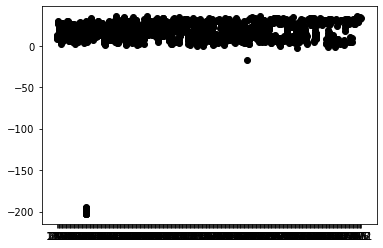

In [35]:
plt.scatter(y_test,y_pred,color='black')
plt.show()

In [36]:
from sklearn.linear_model import Lasso

In [37]:
a=Lasso(alpha=0.5)
a.fit(X_train, y_train)

C:\Users\verti\anaconda3\envs\tfp\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24146.071463026565, tolerance: 1325.841498107168
  positive)


Lasso(alpha=0.5)

In [38]:
print("R^2 on train set : {}".format(a.score(X_train, y_train)))

R^2 on train set : 0.9941438379910567


In [39]:
print("R^2 on train set : {}".format(a.score(X_test, y_test)))

R^2 on train set : 0.9940629788127316


In [40]:
from sklearn.tree import DecisionTreeRegressor

In [41]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [42]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtr.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


In [43]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtr.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.9998543660614443
